In [6]:
#import libraries
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) #Adjusts the configuration of the plots we will create

In [4]:
# read the data

df = pd.read_csv('movies.csv')

In [5]:
# Looking at the data
df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime  
0   46998772.0        Warner Bros.    146.0  
1   58853106.0   Columbia Pictures    104.0  
2  538375067.0           Lucasfilm    124.0  
3   83453539.0  Paramount Pictures     88.0  
4   39846344.0      Orion Pictures     98.0

In [10]:
# Looking for missing data
for col in df.columns:
    #Lo que hacemos en la linea 6 es primero ver si hay valores nulos, los que serán rellenados con 
    # False (0) si no es nulo o True (1) si es nulo, y a eso la función mean() de numpy le sacará un promedio, 
    # lo multiplicamos por 100 para obtener el %
    pct_missing = np.mean(df[col].isnull())*100
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 1.004173187271779%
genre - 0.0%
year - 0.0%
released - 0.02608242044861763%
score - 0.03912363067292645%
votes - 0.03912363067292645%
director - 0.0%
writer - 0.03912363067292645%
star - 0.013041210224308816%
country - 0.03912363067292645%
budget - 28.31246739697444%
gross - 2.464788732394366%
company - 0.2217005738132499%
runtime - 0.05216484089723526%


In [16]:
# Data type for columns
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [22]:
#Veremos que originalmente las columnas budget y gross tenían
#NaN values, por lo que estos serán reemplazados por 0.
df['budget'].fillna(0, inplace=True)
df['budget']
df['gross'].fillna(0, inplace=True)
df['gross']

0        46998772.0
1        58853106.0
2       538375067.0
3        83453539.0
4        39846344.0
           ...     
7663            0.0
7664            0.0
7665            0.0
7666            0.0
7667            0.0
Name: gross, Length: 7668, dtype: float64

In [23]:
# Changing data type of columns
df['budget'] = df['budget'].astype('int64')

df['gross'] = df['gross'].astype('int64')

In [24]:
#Creamos una columna de año de lanzamiento en base a la columna released
df['year_corrected'] = df['released'].astype('str').str[:4]
df

name rating      genre  year  \
0                                        The Shining      R      Drama  1980   
1                                    The Blue Lagoon      R  Adventure  1980   
2     Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                          Airplane!     PG     Comedy  1980   
4                                         Caddyshack      R     Comedy  1980   
...                                              ...    ...        ...   ...   
7663                                    More to Life    NaN      Drama  2020   
7664                                     Dream Round    NaN     Comedy  2020   
7665                                   Saving Mbango    NaN      Drama  2020   
7666                                    It's Just Us    NaN      Drama  2020   
7667                                       Tee em el    NaN     Horror  2020   

                              released  score      votes         director  \
0        June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1         July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2        June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3         July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4        July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   
...                                ...    ...        ...              ...   
7663  October 23, 2020 (United States)    3.1       18.0    Joseph Ebanks   
7664  February 7, 2020 (United States)    4.7       36.0     Dusty Dukatz   
7665         April 27, 2020 (Cameroon)    5.7       29.0     Nkanya Nkwai   
7666   October 1, 2020 (United States)    NaN        NaN    James Randall   
7667   August 19, 2020 (United States)    5.7        7.0     Pereko Mosia   

                       writer              star         country    budget  \
0                Stephen King    Jack Nicholson  United Kingdom  19000000   
1     Henry De Vere Stacpoole    Brooke Shields   United States   4500000   
2              Leigh Brackett       Mark Hamill   United States  18000000   
3                Jim Abrahams       Robert Hays   United States   3500000   
4          Brian Doyle-Murray       Chevy Chase   United States   6000000   
...                       ...               ...             ...       ...   
7663            Joseph Ebanks      Shannon Bond   United States      7000   
7664              Lisa Huston  Michael Saquella   United States         0   
7665             Lynno Lovert      Onyama Laura   United States     58750   
7666            James Randall     Christina Roz   United States     15000   
7667             Pereko Mosia  Siyabonga Mabaso    South Africa         0   

          gross                    company  runtime year_corrected  
0      46998772               Warner Bros.    146.0           June  
1      58853106          Columbia Pictures    104.0           July  
2     538375067                  Lucasfilm    124.0           June  
3      83453539         Paramount Pictures     88.0           July  
4      39846344             Orion Pictures     98.0           July  
...         ...                        ...      ...            ...  
7663          0                        NaN     90.0           Octo  
7664          0  Cactus Blue Entertainment     90.0           Febr  
7665          0           Embi Productions      NaN           Apri  
7666          0                        NaN    120.0           Octo  
7667          0                PK 65 Films    102.0           Augu  

[7668 rows x 16 columns]

In [33]:
#Ordenamos el dataframe con base en la columna 'gross'
#inplace = False para no modificar el df original
#ascending = False porque queremos de mayor a menor
df = df.sort_values(by = ['gross'], inplace = False, ascending = False)


In [26]:
#usando pandas y la función set_option podremos ahora explorar
#todo el conjunto de datos de resultado (del comando anterior, por ejemplo)
#pondrá barras de deslizamiento de forma vertical si son muchas filas
#u horizontal si son muchas columnas
pd.set_option('display.max_rows', None)


In [29]:
#eliminando duplicados:
#df['company'] = df['company'].drop_duplicates().sort_values(ascending = False)
#df.drop_duplicates()

In [30]:
# Creemos que la mayor correlación se da entre budget y gross, se supone que a mayor
# gasto en la película, mayor ingreso tendrá

# También podemos ver que la compañía podría tener una alta correlación

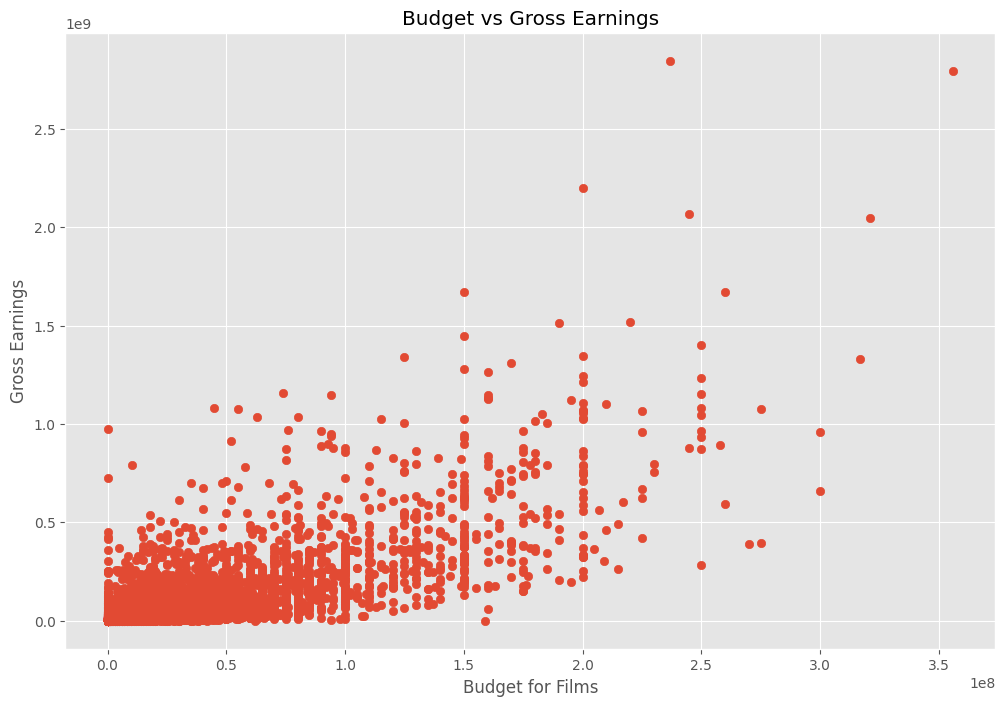

In [35]:
# Haremos un scatter plot para verificar la correlación de dichas variables.
# Compararemos BUDGET vs GROSS REVENUE

plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Budget for Films')
plt.ylabel('Gross Earnings')
plt.show()

In [36]:
# Vemos que Budget y Gross tienen una cierta correlación, pero ahora verificaremos de 
# mejor forma esto y haremos un gráfico de regresión:

<AxesSubplot: xlabel='budget', ylabel='gross'>

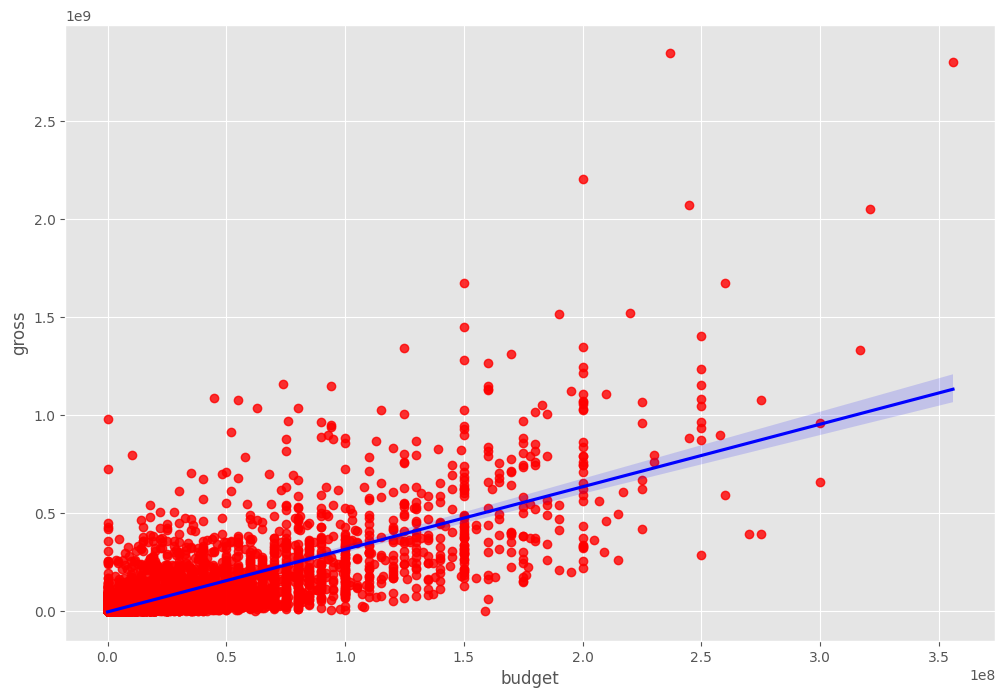

In [38]:
# Plot Budget vs Gross usando Seaborn
#scatter_kws={"color": "red"} para cambiar el color de los puntos
#line_kws={"color":"blue"} para cambiar el color de la linea
sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color": "red"}, line_kws={"color":"blue"})

In [42]:
# Vemos que hay una correlación positiva, pero seremos más precisos y calcularemos el valor exacto
# .corr() solo funciona para valores numéricos
# Tenemos diferentes tipos de correlación: Pearson, Kendall y Spearman
# La correlación por defecto es Pearson. Podemos modificarla si agregamos method='correlacion'
#df.corr(method='pearson')
df.corr()

/var/folders/w3/7gmjyqcj38d11bqtxg4cc1j40000gn/T/ipykernel_26604/507219912.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


year     score     votes    budget     gross   runtime
year     1.000000  0.097995  0.222945  0.309212  0.261900  0.120811
score    0.097995  1.000000  0.409182  0.055665  0.186392  0.399451
votes    0.222945  0.409182  1.000000  0.486862  0.632834  0.309212
budget   0.309212  0.055665  0.486862  1.000000  0.750157  0.269510
gross    0.261900  0.186392  0.632834  0.750157  1.000000  0.245235
runtime  0.120811  0.399451  0.309212  0.269510  0.245235  1.000000

In [43]:
# Haremos una visualización de las correlaciones, ya que es más facil que verlas 
# en una tabla
# High correlation between budget and gross: CHECK

/var/folders/w3/7gmjyqcj38d11bqtxg4cc1j40000gn/T/ipykernel_26604/42258521.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


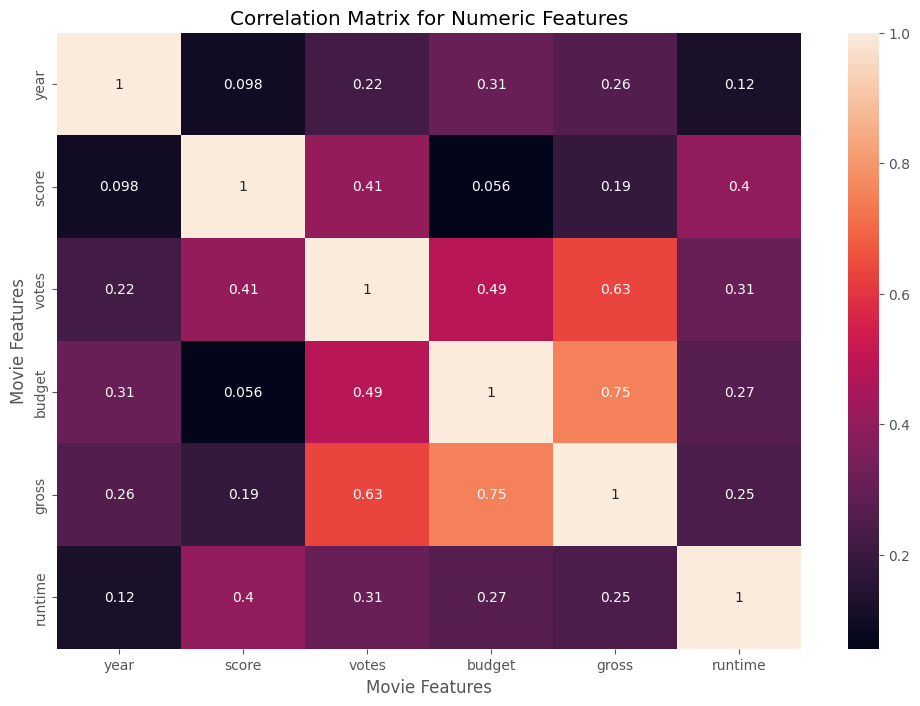

In [46]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [47]:
# Del gráfico anterior es más facil observar que budget y gross tienen la correlación 
# más alta solo por la escala de color, mientras que la más baja es budget y score,
# también por la escala de color, valor cercano al negro.

In [48]:
# Ahora veremos la relación entre la compañía y gross.
# Sabemos que la compañía no tiene un valor numérico, pero podemos asignarle un valor
# a cada compañía, como un id único

#También podríamos hacer lo mismo con país, director, género, etc.
# .cat.codes es lo que nos da la numeración aleatoria para cada valor de la categoría

df_numerized = df

for col_name in df_numerized.columns:
    if (df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized

name  rating  genre  year  released  score      votes  director  writer  \
5445   533       5      0  2009       696    7.8  1100000.0      1155    1778   
7445   535       5      0  2019       183    8.4   903000.0       162     743   
3045  6896       5      6  1997       704    7.8  1100000.0      1155    1778   
6663  5144       5      0  2015       698    7.8   876000.0      1125    2550   
7244   536       5      0  2018       192    8.4   897000.0       162     743   
7480  6194       4      2  2019      1488    6.9   222000.0      1455    1919   
6653  2969       5      0  2015      1704    7.0   593000.0       517    3568   
6043  5502       5      0  2012      2472    8.0  1300000.0      1517    2314   
6646  2145       5      0  2015       221    7.1   370000.0      1189     706   
7494  2131       4      2  2019      2676    6.8   148000.0       432    1950   
6644   534       5      0  2015      2235    7.3   777000.0      1517    2314   
7247   791       5      0  2018       959    7.3   661000.0      2457    3795   
5845  2407       5      1  2011      1445    8.1   790000.0       679    4052   
7075  5145       5      0  2017       661    7.0   581000.0      2282    3518   
7271  2970       5      0  2018      1799    6.2   277000.0      1121    1093   
6262  2130       4      2  2013      2715    7.4   585000.0       432    1950   
7072   657       4      7  2017      2022    7.1   283000.0       250    4000   
7281  2760       4      2  2018      1729    7.6   263000.0       303     491   
7055  5833       5      0  2017        61    6.6   214000.0       835    1431   
6244  2823       5      0  2013      2449    7.1   779000.0      2543    1174   
6688  3622       4      2  2015      1395    6.4   218000.0      1639     534   
6846  1056       5      0  2016      2488    7.8   694000.0       162     743   
7250   474       5      0  2018       748    6.9   404000.0      1189     990   
4245  6221       5      0  2003       680    8.9  1700000.0      2193    1745   
7458  5084       5      0  2019      1501    7.5   359000.0      1463     704   
7456  1061       5      0  2019      2213    6.8   478000.0       147     255   
5878  6968       5      0  2011      1870    6.2   390000.0      1886    1237   
6059  4951       5      0  2012      2804    7.7   642000.0      2476    3125   
6494  6967       5      0  2014      1849    5.6   302000.0      1886    1237   
2448  6194       1      2  1994      1811    8.5   970000.0      2415    1702   
6047  5726       5      0  2012      1510    8.4  1600000.0       483    2265   
7463  5141       5      0  2019       731    6.5   394000.0      1125     714   
7450  2930       6      5  2019      3062    8.4  1000000.0      2767    4248   
7488  6949       1      2  2019      1787    7.7   217000.0      1509    2158   
5685  6948       1      2  2010      1752    8.2   776000.0      1678    2158   
4852  4258       5      0  2006      1645    7.3   668000.0       996    4147   
6869  4616       5      0  2016       673    7.8   572000.0       912     717   
7481   290       4      1  2019      2394    6.9   239000.0      1031    2078   
5860  4261       5      0  2011      2350    6.6   492000.0      2341    4147   
7140  1552       4      2  2017      1896    6.3   119000.0      1639     758   
2245  2967       5      0  1993      1689    8.1   894000.0      2660    2931   
6908  1978       4      2  2016      1744    7.3   250000.0       124     215   
3451  5138       4      0  1999      2318    6.5   748000.0       963    1472   
5667   300       4      1  2010      2182    6.4   392000.0      2745    2607   
6863  7504       4      2  2016      2175    8.0   450000.0       362     576   
6045  6001       5      1  2012       651    7.8   773000.0      2193    1359   
3843  2412       4      1  2001      2593    7.6   685000.0       435    1741   
5243  5725       5      0  2008      1476    9.0  2400000.0       483    2265   
5652  2406       5      1  2010      

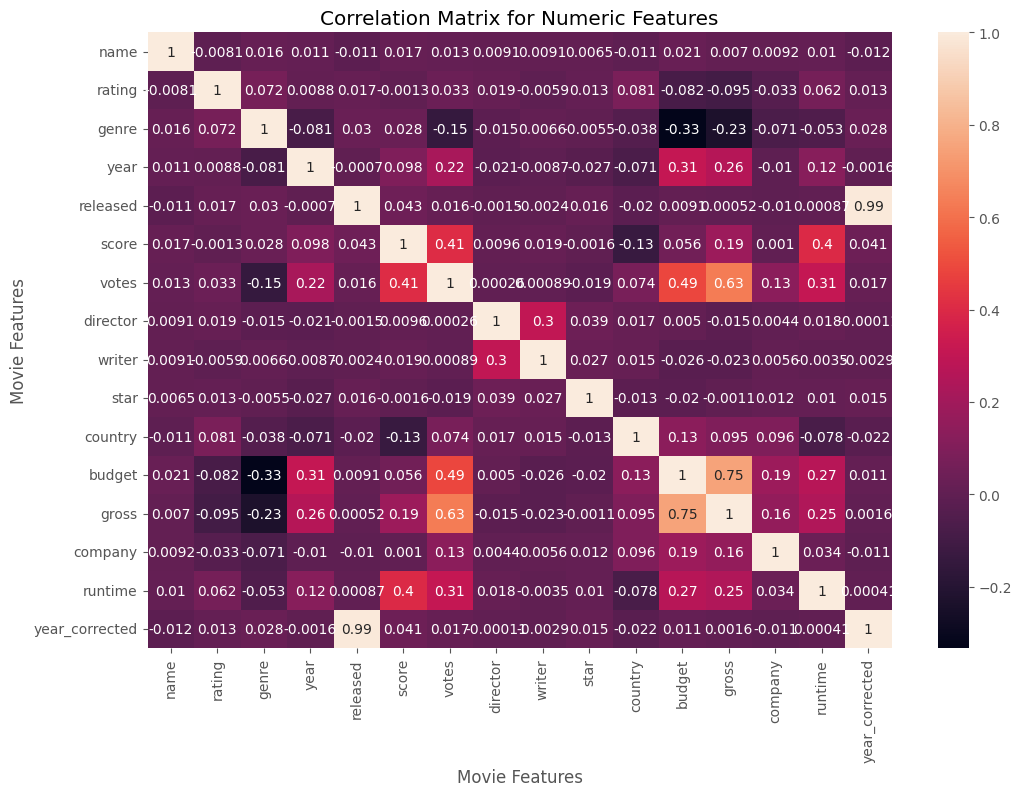

In [49]:
# Ahora haremos la matriz de correlación para nuestro nuevo dataframe.
# Tendremos la correlación de cada uno de los campos
correlation_matrix = df_numerized.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [51]:
# Ahora filtraremos los datos para que la matriz sea más fácil de visualizar.
# Organizaremos la matriz de tal manera que podamos identificar rápidamente los campos
# que se correlacionan de la mejor forma
# con .unstack() podremos ver cómo se relaciona el primer campo con todos los demás,
# luego el segundo campo con todos los demás y así sucesivamente.

correlation_mat = df_numerized.corr()
corr_pairs = correlation_mat.unstack()
corr_pairs

name            name              1.000000
                rating           -0.008069
                genre             0.016355
                year              0.011453
                released         -0.011311
                score             0.017097
                votes             0.013088
                director          0.009079
                writer            0.009081
                star              0.006472
                country          -0.010737
                budget            0.020548
                gross             0.006989
                company           0.009211
                runtime           0.010392
                year_corrected   -0.011725
rating          name             -0.008069
                rating            1.000000
                genre             0.072423
                year              0.008779
                released          0.016613
                score            -0.001314
                votes             0.033225
           

In [55]:
# Podemos hacer la visualización aún más fácil haciendo lo siguiente, ordenando
# de menor a mayor las correlaciones de los campos:

sorted_pairs = corr_pairs.sort_values()
sorted_pairs

genre           budget           -0.334021
budget          genre            -0.334021
genre           gross            -0.234297
gross           genre            -0.234297
genre           votes            -0.145307
votes           genre            -0.145307
score           country          -0.133348
country         score            -0.133348
gross           rating           -0.095450
rating          gross            -0.095450
                budget           -0.081939
budget          rating           -0.081939
genre           year             -0.081261
year            genre            -0.081261
runtime         country          -0.078412
country         runtime          -0.078412
genre           company          -0.071067
company         genre            -0.071067
year            country          -0.070938
country         year             -0.070938
genre           runtime          -0.052711
runtime         genre            -0.052711
genre           country          -0.037615
country    

In [56]:
# Ahora que tenemos los valores ordenados, podemos filtrar por un valor de correlación
# determinado que nosotros definamos, para hacer más fácil la visualización:

high_corr = sorted_pairs[(sorted_pairs) > 0.5]
high_corr

votes           gross             0.632834
gross           votes             0.632834
                budget            0.750157
budget          gross             0.750157
released        year_corrected    0.993694
year_corrected  released          0.993694
name            name              1.000000
company         company           1.000000
gross           gross             1.000000
budget          budget            1.000000
country         country           1.000000
star            star              1.000000
writer          writer            1.000000
director        director          1.000000
votes           votes             1.000000
score           score             1.000000
released        released          1.000000
year            year              1.000000
genre           genre             1.000000
rating          rating            1.000000
runtime         runtime           1.000000
year_corrected  year_corrected    1.000000
dtype: float64

In [57]:
# Así, podemos identificar que budget y votos son los que se correlacionan en mayor
# medida con gross income.

In [ ]:
# Nota, solo se pueden subir archivos a github de tamaño menor a 25 MB